In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read CSV 
csv = "lichess_2015.csv"
games = pd.read_csv(csv)
games.head()

,Unnamed: 0,White Elo,Black Elo,Result,Opening,ECO,White Score
0,0,1489,1797,0-1,French Defense: Carlson Gambit,C01,-1
1,1,1379,1558,0-1,Lion Defense: Lion's Jaw,B07,-1
2,2,1666,1258,1-0,"King's Gambit Accepted, Fischer Defense",C34,1
3,3,1528,1662,0-1,Scandinavian Defense: Mieses-Kotroc Variation,B01,-1
4,4,1528,1504,1-0,Scandinavian Defense: Mieses-Kotroc Variation,B01,1


In [4]:
winner = []
translate = ["Black", "Draw", "White"]
for score in games["White Score"]:
    winner.append(translate[score + 1])

In [5]:
games["Winner"] = winner
games.head()

,Unnamed: 0,White Elo,Black Elo,Result,Opening,ECO,White Score,Winner
0,0,1489,1797,0-1,French Defense: Carlson Gambit,C01,-1,Black
1,1,1379,1558,0-1,Lion Defense: Lion's Jaw,B07,-1,Black
2,2,1666,1258,1-0,"King's Gambit Accepted, Fischer Defense",C34,1,White
3,3,1528,1662,0-1,Scandinavian Defense: Mieses-Kotroc Variation,B01,-1,Black
4,4,1528,1504,1-0,Scandinavian Defense: Mieses-Kotroc Variation,B01,1,White


In [6]:
games["Skill Disparity"] = abs(games["White Elo"] - games["Black Elo"])
# Favored
favored = []
favor = games["White Elo"] > games["Black Elo"]
for value in favor:
    if value == True:
        favored.append("White")
    else:
        favored.append("Black")
games["Favored"] = favored

# Upset
upset = []
ups = (games["Favored"] != games["Winner"]) & (games["Winner"] != "Draw")
for value in ups:
    if value == True:
        upset.append("True")
    else:
        upset.append("False")
games["Upset"] = upset

# Skill Disparity Bin
bin = (0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000)
label = ["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "901-1000", "1000+"]

games["Disparity Group"] = pd.cut(games["Skill Disparity"], bin, labels=label)
games.head()

,Unnamed: 0,White Elo,Black Elo,Result,Opening,ECO,White Score,Winner,Skill Disparity,Favored,Upset,Disparity Group
0,0,1489,1797,0-1,French Defense: Carlson Gambit,C01,-1,Black,308,Black,False,301-400
1,1,1379,1558,0-1,Lion Defense: Lion's Jaw,B07,-1,Black,179,Black,False,101-200
2,2,1666,1258,1-0,"King's Gambit Accepted, Fischer Defense",C34,1,White,408,White,False,401-500
3,3,1528,1662,0-1,Scandinavian Defense: Mieses-Kotroc Variation,B01,-1,Black,134,Black,False,101-200
4,4,1528,1504,1-0,Scandinavian Defense: Mieses-Kotroc Variation,B01,1,White,24,White,False,0-100


In [7]:
games_upset = games.loc[games["Upset"] == "True"]
upset = games_upset["Upset"].count()
games_expected = games.loc[games["Upset"] == "False"]
expected = games_expected["Upset"].count()

total_games = upset + expected
upset_percent = round(100 * upset/total_games, 2)
expected_percent = round(100 * expected/total_games, 2)


print(f"Total games: {total_games}")
print(f"Number of upset victories: {upset}, ({upset_percent}%)")
print(f"Number of expected victories: {expected}, ({expected_percent}%)")

general = {'Expected Victories': [expected_percent],
          'Upset Victories': [upset_percent]}
general_df = pd.DataFrame(general)
general_df.style.format("{:.2f}%")

Total games: 2000000
Number of upset victories: 670434, (33.52%)
Number of expected victories: 1329566, (66.48%)


,Expected Victories,Upset Victories
0,66.48%,33.52%


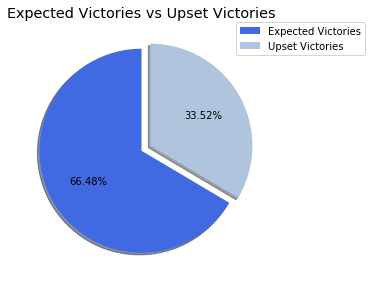

In [8]:
# Plot Expected Victories vs Upset Victories

labels = ["Expected Victories", "Upset Victories"]
sizes = [expected_percent, upset_percent]
colors = ["royalblue", "lightsteelblue"]
explode = [0, 0.1]

fig_1 = plt.pie(sizes, explode=explode, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=90)
plt.legend(labels, bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.rcParams['font.size'] = 12
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.tight_layout()
plt.title("Expected Victories vs Upset Victories")
plt.savefig("UpsetPie.png")

In [9]:
# Disparity groups of each match
disparity_matches = games.groupby(games["Disparity Group"]).count()["Result"]
disparity_matches

Disparity Group
0-100       945662
101-200     531463
201-300     264116
301-400     130391
401-500      62953
501-600      31371
601-700      14845
701-800       6684
801-900       3096
901-1000      1449
1000+          824
Name: Result, dtype: int64

In [10]:
# Upsets by disparity group
group_1 = games.loc[games["Disparity Group"] == "0-100"]
group_2 = games.loc[games["Disparity Group"] == "101-200"]
group_3 = games.loc[games["Disparity Group"] == "201-300"]
group_4 = games.loc[games["Disparity Group"] == "301-400"]
group_5 = games.loc[games["Disparity Group"] == "401-500"]
group_6 = games.loc[games["Disparity Group"] == "501-600"]
group_7 = games.loc[games["Disparity Group"] == "601-700"]
group_8 = games.loc[games["Disparity Group"] == "701-800"]
group_9 = games.loc[games["Disparity Group"] == "801-900"]
group_10 = games.loc[games["Disparity Group"] == "901-1000"]
group_11 = games.loc[games["Disparity Group"] == "1000+"]

In [11]:
# Upsets in 0-100 group
upset_1 = group_1.loc[group_1["Upset"] == "True"].count()["Upset"]
upset_1_p = round(100 * upset_1/disparity_matches[0], 2)
print(f"Upsets (0-100): {upset_1} ({upset_1_p}%)")

# Upsets in 101-200 group
upset_2 = group_2.loc[group_2["Upset"] == "True"].count()["Upset"]
upset_2_p = round(100 * upset_2/disparity_matches[1], 2)
print(f"Upsets (101-200): {upset_2} ({upset_2_p}%)")

# Upsets in 201-300 group
upset_3 = group_3.loc[group_3["Upset"] == "True"].count()["Upset"]
upset_3_p = round(100 * upset_3/disparity_matches[2], 2)
print(f"Upsets (201-300): {upset_3} ({upset_3_p}%)")

# Upsets in 301-400 group
upset_4 = group_4.loc[group_4["Upset"] == "True"].count()["Upset"]
upset_4_p = round(100 * upset_4/disparity_matches[3], 2)
print(f"Upsets (301-400): {upset_4} ({upset_4_p}%)")

# Upsets in 401-500 group
upset_5 = group_5.loc[group_5["Upset"] == "True"].count()["Upset"]
upset_5_p = round(100 * upset_5/disparity_matches[4], 2)
print(f"Upsets (401-500): {upset_5} ({upset_5_p}%)")

# Upsets in 501-600 group
upset_6 = group_6.loc[group_6["Upset"] == "True"].count()["Upset"]
upset_6_p = round(100 * upset_6/disparity_matches[5], 2)
print(f"Upsets (501-600): {upset_6} ({upset_6_p}%)")

# Upsets in 601-700 group
upset_7 = group_7.loc[group_7["Upset"] == "True"].count()["Upset"]
upset_7_p = round(100 * upset_7/disparity_matches[6], 2)
print(f"Upsets (601-700): {upset_7} ({upset_7_p}%)")

# Upsets in 701-800 group
upset_8 = group_8.loc[group_8["Upset"] == "True"].count()["Upset"]
upset_8_p = round(100 * upset_8/disparity_matches[7], 2)
print(f"Upsets (701-800): {upset_8} ({upset_8_p}%)")

# Upsets in 801-900 group
upset_9 = group_9.loc[group_9["Upset"] == "True"].count()["Upset"]
upset_9_p = round(100 * upset_9/disparity_matches[8], 2)
print(f"Upsets (801-900): {upset_9} ({upset_9_p}%)")

# Upsets in 901-1000 group 
upset_10 = group_10.loc[group_10["Upset"] == "True"].count()["Upset"]
upset_10_p = round(100 * upset_10/disparity_matches[9], 2)
print(f"Upsets (901-1000): {upset_10} ({upset_10_p}%)")

# Upsets in 1000+ group
upset_11 = group_11.loc[group_11["Upset"] == "True"].count()["Upset"]
upset_11_p = round(100 * upset_11/disparity_matches[10], 2)
print(f"Upsets (1000+): {upset_11} ({upset_11_p}%)")

Upsets (0-100): 401826 (42.49%)
Upsets (101-200): 169817 (31.95%)
Upsets (201-300): 60997 (23.09%)
Upsets (301-400): 21718 (16.66%)
Upsets (401-500): 7729 (12.28%)
Upsets (501-600): 3000 (9.56%)
Upsets (601-700): 1088 (7.33%)
Upsets (701-800): 442 (6.61%)
Upsets (801-900): 192 (6.2%)
Upsets (901-1000): 76 (5.24%)
Upsets (1000+): 35 (4.25%)


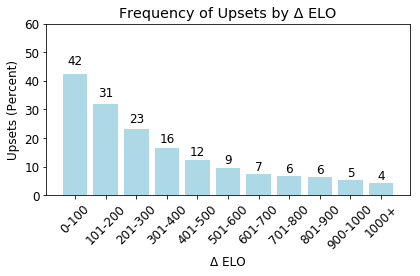

In [14]:
# Plot frequency of upsets by Δ ELO
Δ_ELO = ["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "900-1000", "1000+"]
upset_f = [upset_1_p, upset_2_p, upset_3_p, upset_4_p, upset_5_p, upset_6_p, upset_7_p, upset_8_p, upset_9_p, upset_10_p, upset_11_p]
x_axis = np.arange(len(upset_f))

fig_2 = plt.bar(x_axis, upset_f, color="lightblue", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Δ_ELO, rotation='45')
plt.rcParams['xtick.labelsize'] = "medium"
plt.title("Frequency of Upsets by Δ ELO")
plt.xlabel("Δ ELO")
plt.ylabel("Upsets (Percent)")
plt.ylim([0, 60])
plt.tight_layout()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(fig_2)

plt.savefig("UpsetFrequency.png")

In [15]:
upset = [upset_1_p, upset_2_p, upset_3_p, upset_4_p, upset_5_p, upset_6_p, upset_7_p, upset_8_p, upset_9_p, upset_10_p, upset_11_p]
upset
upset_df = pd.DataFrame(Δ_ELO)
upset_df["Rate of Upsets"] = upset
upset_df = upset_df.rename(columns={0: "Δ ELO"})
upset_df = upset_df.set_index("Δ ELO")
upset_df = upset_df.style.format("{:.2f}%")
upset_df

,Rate of Upsets
Δ ELO,
0-100,42.49%
101-200,31.95%
201-300,23.09%
301-400,16.66%
401-500,12.28%
501-600,9.56%
601-700,7.33%
701-800,6.61%
801-900,6.20%


In [16]:
# White vs Black 
white = games.loc[games["Winner"] == "White"].count()["Winner"]
black = games.loc[games["Winner"] == "Black"].count()["Winner"]
draw = games.loc[games["Winner"] == "Draw"].count()["Winner"]
total = white + black + draw
white_p = round(100 * white/total, 2)
black_p = round(100 * black/total, 2)
draw_p = round(100 * draw/total, 2)
print(f"White Wins (Total) = {white} ({white_p}%)")
print(f"Black Wins (Total) = {black} ({black_p}%)")
print(f"Draws (Total) = {draw} ({draw_p}%)")

win_rate = {'White Wins': [white_p],
           'Black Wins': [black_p],
           'Draws': [draw_p]}
win_rate_df = pd.DataFrame(win_rate)
win_rate_df = win_rate_df.style.format("{:.2f}%")
win_rate_df

White Wins (Total) = 999004 (49.95%)
Black Wins (Total) = 930111 (46.51%)
Draws (Total) = 70885 (3.54%)


,White Wins,Black Wins,Draws
0,49.95%,46.51%,3.54%


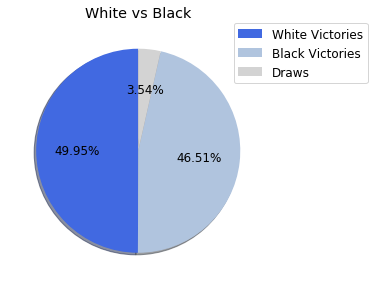

In [32]:
# Plot White vs Black

labels = ["White Victories", "Black Victories", "Draws"]
sizes = [white_p, black_p, draw_p]
colors = ["royalblue", "lightsteelblue", "lightgrey"]


fig_3 = plt.pie(sizes, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=90)
plt.legend(labels, bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.rcParams['font.size'] = 12
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.tight_layout()
plt.title("White vs Black")
plt.savefig("WhiteVSBlack.png")

In [18]:
# White vs Black (0-100)
games_1 = games.loc[games["Disparity Group"] == "0-100"]
white_1 = games_1.loc[games["Winner"] == "White"].count()["Winner"]
black_1 = games_1.loc[games["Winner"] == "Black"].count()["Winner"]
draw_1 = games_1.loc[games["Winner"] == "Draw"].count()["Winner"]
total_1 = white_1 + black_1 + draw_1
white_1_p = round(100 * white_1/total_1, 2)
black_1_p = round(100 * black_1/total_1, 2)
draw_1_p = round(100 * draw_1/total_1, 2)

# Favored Wins/Upset
games_1_f = games_1.loc[games["Winner"] == games["Favored"]]
wfw_1 = games_1_f.loc[games_1_f["Winner"] == "White"].count()["Winner"]
bfw_1 = games_1_f.loc[games_1_f["Winner"] == "Black"].count()["Winner"]
games_1_u = games_1.loc[games["Winner"] != games["Favored"]]
wfu_1 = games_1_u.loc[games_1_u["Winner"] == "Black"].count()["Winner"]
bfu_1 = games_1_u.loc[games_1_u["Winner"] == "White"].count()["Winner"]

wtot_1 = wfw_1 + wfu_1
btot_1 = bfw_1 + bfu_1
wfw_1p = round(100 * wfw_1/wtot_1, 2)
wfu_1p = round(100 * wfu_1/wtot_1, 2)
bfw_1p = round(100 * bfw_1/btot_1, 2)
bfu_1p = round(100 * bfu_1/btot_1, 2)

print(f"White Wins (0-100): {white_1} ({white_1_p}%)")
print(f"Black Wins (0-100): {black_1} ({black_1_p}%)")
print(f"Draws (0-100): {draw_1} ({draw_1_p}%)")
print("----------------------------------------------")
print(f"White Favored Wins (0-100): {wfw_1} ({wfw_1p}%)")
print(f"White Favored Upset (0-100): {wfu_1} ({wfu_1p}%)")
print(f"Black Favored Wins (0-100): {bfw_1} ({bfw_1p}%)")
print(f"Black Favored Upset (0-100): {bfu_1} ({bfu_1p}%)")

# Display general outcome in a dataframe
outcomes_1 = {'Δ ELO': "0-100",
              'White Wins': [white_1_p],
              'Black Wins': [black_1_p],
              'Draws': [draw_1_p]}
outcomes_df = pd.DataFrame(outcomes_1)
outcomes_df

# Display favored outcome in a dataframe
favored_1 = {'Δ ELO': "0-100",
             'White Favored Wins': [wfw_1p],
             'White Favored Upsets': [wfu_1p],
             'Black Favored Wins': [bfw_1p], 
             'Black Favored Upsets': [bfu_1p]}
favored_df = pd.DataFrame(favored_1)
favored_df

White Wins (0-100): 468838 (49.58%)
Black Wins (0-100): 438362 (46.36%)
Draws (0-100): 38462 (4.07%)
----------------------------------------------
White Favored Wins (0-100): 262200 (57.33%)
White Favored Upset (0-100): 195188 (42.67%)
Black Favored Wins (0-100): 243174 (54.06%)
Black Favored Upset (0-100): 206638 (45.94%)


,Δ ELO,White Favored Wins,White Favored Upsets,Black Favored Wins,Black Favored Upsets
0,0-100,57.33,42.67,54.06,45.94


In [19]:
# White vs Black (101-200)
games_2 = games.loc[games["Disparity Group"] == "101-200"]
white_2 = games_2.loc[games["Winner"] == "White"].count()["Winner"]
black_2 = games_2.loc[games["Winner"] == "Black"].count()["Winner"]
draw_2 = games_2.loc[games["Winner"] == "Draw"].count()["Winner"]
total_2 = white_2 + black_2 + draw_2
white_2_p = round(100 * white_2/total_2, 2)
black_2_p = round(100 * black_2/total_2, 2)
draw_2_p = round(100 * draw_2/total_2, 2)

# Favored Wins/Upset
games_2_f = games_2.loc[games["Winner"] == games["Favored"]]
wfw_2 = games_2_f.loc[games_2_f["Winner"] == "White"].count()["Winner"]
bfw_2 = games_2_f.loc[games_2_f["Winner"] == "Black"].count()["Winner"]
games_2_u = games_2.loc[games["Winner"] != games["Favored"]]
wfu_2 = games_2_u.loc[games_2_u["Winner"] == "Black"].count()["Winner"]
bfu_2 = games_2_u.loc[games_2_u["Winner"] == "White"].count()["Winner"]

wtot_2 = wfw_2 + wfu_2
btot_2 = bfw_2 + bfu_2
wfw_2p = round(100 * wfw_2/wtot_2, 2)
wfu_2p = round(100 * wfu_2/wtot_2, 2)
bfw_2p = round(100 * bfw_2/btot_2, 2)
bfu_2p = round(100 * bfu_2/btot_2, 2)

print(f"White Wins (101-200): {white_2} ({white_2_p}%)")
print(f"Black Wins (101-200): {black_2} ({black_2_p}%)")
print(f"Draws (101-200): {draw_2} ({draw_2_p}%)")
print("----------------------------------------------")
print(f"White Favored Wins (101-200): {wfw_2} ({wfw_2p}%)")
print(f"White Favored Upset (101-200): {wfu_2} ({wfu_2p}%)")
print(f"Black Favored Wins (101-200): {bfw_2} ({bfw_2p}%)")
print(f"Black Favored Upset (101-200): {bfu_2} ({bfu_2p}%)")

# Display in a dataframe
outcomes_2 = {'Δ ELO': "101-200",
              'White Wins': white_2_p,
              'Black Wins': black_2_p,
              'Draws': draw_2_p}
outcomes_df = outcomes_df.append(outcomes_2, ignore_index=True)

# Display favored outcome in a dataframe
favored_2 = {'Δ ELO': "101-200",
             'White Favored Wins': wfw_2p,
             'White Favored Upsets': wfu_2p,
             'Black Favored Wins': bfw_2p, 
             'Black Favored Upsets': bfu_2p}
favored_df = favored_df.append(favored_2, ignore_index=True)

White Wins (101-200): 265594 (49.97%)
Black Wins (101-200): 246294 (46.34%)
Draws (101-200): 19575 (3.68%)
----------------------------------------------
White Favored Wins (101-200): 178264 (68.37%)
White Favored Upset (101-200): 82487 (31.63%)
Black Favored Wins (101-200): 163807 (65.23%)
Black Favored Upset (101-200): 87330 (34.77%)


In [20]:
# White vs Black (201-300)
games_3 = games.loc[games["Disparity Group"] == "201-300"]
white_3 = games_3.loc[games["Winner"] == "White"].count()["Winner"]
black_3 = games_3.loc[games["Winner"] == "Black"].count()["Winner"]
draw_3 = games_3.loc[games["Winner"] == "Draw"].count()["Winner"]
total_3 = white_3 + black_3 + draw_3
white_3_p = round(100 * white_3/total_3, 2)
black_3_p = round(100 * black_3/total_3, 2)
draw_3_p = round(100 * draw_3/total_3, 2)

# Favored Wins/Upset
games_3_f = games_3.loc[games["Winner"] == games["Favored"]]
wfw_3 = games_3_f.loc[games_3_f["Winner"] == "White"].count()["Winner"]
bfw_3 = games_3_f.loc[games_3_f["Winner"] == "Black"].count()["Winner"]
games_3_u = games_3.loc[games["Winner"] != games["Favored"]]
wfu_3 = games_3_u.loc[games_3_u["Winner"] == "Black"].count()["Winner"]
bfu_3 = games_3_u.loc[games_3_u["Winner"] == "White"].count()["Winner"]

wtot_3 = wfw_3 + wfu_3
btot_3 = bfw_3 + bfu_3
wfw_3p = round(100 * wfw_3/wtot_3, 2)
wfu_3p = round(100 * wfu_3/wtot_3, 2)
bfw_3p = round(100 * bfw_3/btot_3, 2)
bfu_3p = round(100 * bfu_3/btot_3, 2)


print(f"White Wins (201-300): {white_3} ({white_3_p}%)")
print(f"Black Wins (201-300): {black_3} ({black_3_p}%)")
print(f"Draws (201-300): {draw_3} ({draw_3_p}%)")
print("----------------------------------------------")
print(f"White Favored Wins (201-300): {wfw_3} ({wfw_3p}%)")
print(f"White Favored Upset (201-300): {wfu_3} ({wfu_3p}%)")
print(f"Black Favored Wins (201-300): {bfw_3} ({bfw_3p}%)")
print(f"Black Favored Upset (201-300): {bfu_3} ({bfu_3p}%)")

# Display in a dataframe
outcomes_3 = {'Δ ELO': "201-300",
              'White Wins': white_3_p,
              'Black Wins': black_3_p,
              'Draws': draw_3_p}
outcomes_df = outcomes_df.append(outcomes_3, ignore_index=True)

# Display favored outcome in a dataframe
favored_3 = {'Δ ELO': "201-300",
             'White Favored Wins': wfw_3p,
             'White Favored Upsets': wfu_3p,
             'Black Favored Wins': bfw_3p, 
             'Black Favored Upsets': bfu_3p}
favored_df = favored_df.append(favored_3, ignore_index=True)

White Wins (201-300): 132993 (50.35%)
Black Wins (201-300): 123246 (46.66%)
Draws (201-300): 7877 (2.98%)
----------------------------------------------
White Favored Wins (201-300): 101975 (77.28%)
White Favored Upset (201-300): 29979 (22.72%)
Black Favored Wins (201-300): 93267 (75.04%)
Black Favored Upset (201-300): 31018 (24.96%)


In [21]:
# White vs Black (301-400)
games_4 = games.loc[games["Disparity Group"] == "301-400"]
white_4 = games_4.loc[games["Winner"] == "White"].count()["Winner"]
black_4 = games_4.loc[games["Winner"] == "Black"].count()["Winner"]
draw_4 = games_4.loc[games["Winner"] == "Draw"].count()["Winner"]
total_4 = white_4 + black_4 + draw_4
white_4_p = round(100 * white_4/total_4, 2)
black_4_p = round(100 * black_4/total_4, 2)
draw_4_p = round(100 * draw_4/total_4, 2)

# Favored Wins/Upset
games_4_f = games_4.loc[games["Winner"] == games["Favored"]]
wfw_4 = games_4_f.loc[games_4_f["Winner"] == "White"].count()["Winner"]
bfw_4 = games_4_f.loc[games_4_f["Winner"] == "Black"].count()["Winner"]
games_4_u = games_4.loc[games["Winner"] != games["Favored"]]
wfu_4 = games_4_u.loc[games_4_u["Winner"] == "Black"].count()["Winner"]
bfu_4 = games_4_u.loc[games_4_u["Winner"] == "White"].count()["Winner"]

wtot_4 = wfw_4 + wfu_4
btot_4 = bfw_4 + bfu_4
wfw_4p = round(100 * wfw_4/wtot_4, 2)
wfu_4p = round(100 * wfu_4/wtot_4, 2)
bfw_4p = round(100 * bfw_4/btot_4, 2)
bfu_4p = round(100 * bfu_4/btot_4, 2)


print(f"White Wins (301-400): {white_4} ({white_4_p}%)")
print(f"Black Wins (301-400): {black_4} ({black_4_p}%)")
print(f"Draws (301-400): {draw_4} ({draw_4_p}%)")
print("----------------------------------------------")
print(f"White Favored Wins (301-400): {wfw_4} ({wfw_4p}%)")
print(f"White Favored Upset (301-400): {wfu_4} ({wfu_4p}%)")
print(f"Black Favored Wins (301-400): {bfw_4} ({bfw_4p}%)")
print(f"Black Favored Upset (301-400): {bfu_4} ({bfu_4p}%)")

# Display in a dataframe
outcomes_4 = {'Δ ELO': "301-400",
              'White Wins': white_4_p,
              'Black Wins': black_4_p,
              'Draws': draw_4_p}
outcomes_df = outcomes_df.append(outcomes_4, ignore_index=True)

# Display favored outcome in a dataframe
favored_4 = {'Δ ELO': "301-400",
             'White Favored Wins': wfw_4p,
             'White Favored Upsets': wfu_4p,
             'Black Favored Wins': bfw_4p, 
             'Black Favored Upsets': bfu_4p}
favored_df = favored_df.append(favored_4, ignore_index=True)
favored_df

White Wins (301-400): 66405 (50.93%)
Black Wins (301-400): 61023 (46.8%)
Draws (301-400): 2963 (2.27%)
----------------------------------------------
White Favored Wins (301-400): 55369 (83.83%)
White Favored Upset (301-400): 10682 (16.17%)
Black Favored Wins (301-400): 50341 (82.02%)
Black Favored Upset (301-400): 11036 (17.98%)


,Δ ELO,White Favored Wins,White Favored Upsets,Black Favored Wins,Black Favored Upsets
0,0-100,57.33,42.67,54.06,45.94
1,101-200,68.37,31.63,65.23,34.77
2,201-300,77.28,22.72,75.04,24.96
3,301-400,83.83,16.17,82.02,17.98


In [22]:
# White vs Black (401-500)
games_5 = games.loc[games["Disparity Group"] == "401-500"]
white_5 = games_5.loc[games["Winner"] == "White"].count()["Winner"]
black_5 = games_5.loc[games["Winner"] == "Black"].count()["Winner"]
draw_5 = games_5.loc[games["Winner"] == "Draw"].count()["Winner"]
total_5 = white_5 + black_5 + draw_5
white_5_p = round(100 * white_5/total_5, 2)
black_5_p = round(100 * black_5/total_5, 2)
draw_5_p = round(100 * draw_5/total_5, 2)

# Favored Wins/Upset
games_5_f = games_5.loc[games["Winner"] == games["Favored"]]
wfw_5 = games_5_f.loc[games_5_f["Winner"] == "White"].count()["Winner"]
bfw_5 = games_5_f.loc[games_5_f["Winner"] == "Black"].count()["Winner"]
games_5_u = games_5.loc[games["Winner"] != games["Favored"]]
wfu_5 = games_5_u.loc[games_5_u["Winner"] == "Black"].count()["Winner"]
bfu_5 = games_5_u.loc[games_5_u["Winner"] == "White"].count()["Winner"]

wtot_5 = wfw_5 + wfu_5
btot_5 = bfw_5 + bfu_5
wfw_5p = round(100 * wfw_5/wtot_5, 2)
wfu_5p = round(100 * wfu_5/wtot_5, 2)
bfw_5p = round(100 * bfw_5/btot_5, 2)
bfu_5p = round(100 * bfu_5/btot_5, 2)

print(f"White Wins (401-500): {white_5} ({white_5_p}%)")
print(f"Black Wins (401-500): {black_5} ({black_5_p}%)")
print(f"Draws (401-500): {draw_5} ({draw_5_p}%)")
print("----------------------------------------------")
print(f"White Favored Wins (401-500): {wfw_5} ({wfw_5p}%)")
print(f"White Favored Upset (401-500): {wfu_5} ({wfu_5p}%)")
print(f"Black Favored Wins (401-500): {bfw_5} ({bfw_5p}%)")
print(f"Black Favored Upset (401-500): {bfu_5} ({bfu_5p}%)")

# Display in a dataframe
outcomes_5 = {'Δ ELO': "401-500",
              'White Wins': white_5_p,
              'Black Wins': black_5_p,
              'Draws': draw_5_p}
outcomes_df = outcomes_df.append(outcomes_5, ignore_index=True)

# Display favored outcome in a dataframe
favored_5 = {'Δ ELO': "401-500",
             'White Favored Wins': wfw_5p,
             'White Favored Upsets': wfu_5p,
             'Black Favored Wins': bfw_5p, 
             'Black Favored Upsets': bfu_5p}
favored_df = favored_df.append(favored_5, ignore_index=True)


White Wins (401-500): 32054 (50.92%)
Black Wins (401-500): 29813 (47.36%)
Draws (401-500): 1086 (1.73%)
----------------------------------------------
White Favored Wins (401-500): 28127 (88.09%)
White Favored Upset (401-500): 3802 (11.91%)
Black Favored Wins (401-500): 26011 (86.88%)
Black Favored Upset (401-500): 3927 (13.12%)


In [23]:
# White vs Black (501-600)
games_6 = games.loc[games["Disparity Group"] == "501-600"]
white_6 = games_6.loc[games["Winner"] == "White"].count()["Winner"]
black_6 = games_6.loc[games["Winner"] == "Black"].count()["Winner"]
draw_6 = games_6.loc[games["Winner"] == "Draw"].count()["Winner"]
total_6 = white_6 + black_6 + draw_6
white_6_p = round(100 * white_6/total_6, 2)
black_6_p = round(100 * black_6/total_6, 2)
draw_6_p = round(100 * draw_6/total_6, 2)

# Favored Wins/Upset
games_6_f = games_6.loc[games["Winner"] == games["Favored"]]
wfw_6 = games_6_f.loc[games_6_f["Winner"] == "White"].count()["Winner"]
bfw_6 = games_6_f.loc[games_6_f["Winner"] == "Black"].count()["Winner"]
games_6_u = games_6.loc[games["Winner"] != games["Favored"]]
wfu_6 = games_6_u.loc[games_6_u["Winner"] == "Black"].count()["Winner"]
bfu_6 = games_6_u.loc[games_6_u["Winner"] == "White"].count()["Winner"]

wtot_6 = wfw_6 + wfu_6
btot_6 = bfw_6 + bfu_6
wfw_6p = round(100 * wfw_6/wtot_6, 2)
wfu_6p = round(100 * wfu_6/wtot_6, 2)
bfw_6p = round(100 * bfw_6/btot_6, 2)
bfu_6p = round(100 * bfu_6/btot_6, 2)

print(f"White Wins (501-600): {white_6} ({white_6_p}%)")
print(f"Black Wins (501-600): {black_6} ({black_6_p}%)")
print(f"Draws (501-600): {draw_6} ({draw_6_p}%)")
print("----------------------------------------------")
print(f"White Favored Wins (501-600): {wfw_6} ({wfw_6p}%)")
print(f"White Favored Upset (501-600): {wfu_6} ({wfu_6p}%)")
print(f"Black Favored Wins (501-600): {bfw_6} ({bfw_6p}%)")
print(f"Black Favored Upset (501-600): {bfu_6} ({bfu_6p}%)")

# Display in a dataframe
outcomes_6 = {'Δ ELO': "501-600",
              'White Wins': white_6_p,
              'Black Wins': black_6_p,
              'Draws': draw_6_p}
outcomes_df = outcomes_df.append(outcomes_6, ignore_index=True)

# Display favored outcome in a dataframe
favored_6 = {'Δ ELO': "501-600",
             'White Favored Wins': wfw_6p,
             'White Favored Upsets': wfu_6p,
             'Black Favored Wins': bfw_6p, 
             'Black Favored Upsets': bfu_6p}
favored_df = favored_df.append(favored_6, ignore_index=True)

White Wins (501-600): 15889 (50.65%)
Black Wins (501-600): 15100 (48.13%)
Draws (501-600): 382 (1.22%)
----------------------------------------------
White Favored Wins (501-600): 14405 (90.48%)
White Favored Upset (501-600): 1516 (9.52%)
Black Favored Wins (501-600): 13584 (90.15%)
Black Favored Upset (501-600): 1484 (9.85%)


In [24]:
# White vs Black (601-700)
games_7 = games.loc[games["Disparity Group"] == "601-700"]
white_7 = games_7.loc[games["Winner"] == "White"].count()["Winner"]
black_7 = games_7.loc[games["Winner"] == "Black"].count()["Winner"]
draw_7 = games_7.loc[games["Winner"] == "Draw"].count()["Winner"]
total_7 = white_7 + black_7 + draw_7
white_7_p = round(100 * white_7/total_7, 2)
black_7_p = round(100 * black_7/total_7, 2)
draw_7_p = round(100 * draw_7/total_7, 2)

# Favored Wins/Upset
games_7_f = games_7.loc[games["Winner"] == games["Favored"]]
wfw_7 = games_7_f.loc[games_7_f["Winner"] == "White"].count()["Winner"]
bfw_7 = games_7_f.loc[games_7_f["Winner"] == "Black"].count()["Winner"]
games_7_u = games_7.loc[games["Winner"] != games["Favored"]]
wfu_7 = games_7_u.loc[games_7_u["Winner"] == "Black"].count()["Winner"]
bfu_7 = games_7_u.loc[games_7_u["Winner"] == "White"].count()["Winner"]

wtot_7 = wfw_7 + wfu_7
btot_7 = bfw_7 + bfu_7
wfw_7p = round(100 * wfw_7/wtot_7, 2)
wfu_7p = round(100 * wfu_7/wtot_7, 2)
bfw_7p = round(100 * bfw_7/btot_7, 2)
bfu_7p = round(100 * bfu_7/btot_7, 2)

print(f"White Wins (601-700): {white_7} ({white_7_p}%)")
print(f"Black Wins (601-700): {black_7} ({black_7_p}%)")
print(f"Draws (601-700): {draw_7} ({draw_7_p}%)")
print("----------------------------------------------")
print(f"White Favored Wins (601-700): {wfw_7} ({wfw_7p}%)")
print(f"White Favored Upset (601-700): {wfu_7} ({wfu_7p}%)")
print(f"Black Favored Wins (601-700): {bfw_7} ({bfw_7p}%)")
print(f"Black Favored Upset (601-700): {bfu_7} ({bfu_7p}%)")

# Display in a dataframe
outcomes_7 = {'Δ ELO': "601-700",
              'White Wins': white_7_p,
              'Black Wins': black_7_p,
              'Draws': draw_7_p}
outcomes_df = outcomes_df.append(outcomes_7, ignore_index=True)

# Display favored outcome in a dataframe
favored_7 = {'Δ ELO': "601-700",
             'White Favored Wins': wfw_7p,
             'White Favored Upsets': wfu_7p,
             'Black Favored Wins': bfw_7p, 
             'Black Favored Upsets': bfu_7p}
favored_df = favored_df.append(favored_7, ignore_index=True)

White Wins (601-700): 7590 (51.13%)
Black Wins (601-700): 7116 (47.94%)
Draws (601-700): 139 (0.94%)
----------------------------------------------
White Favored Wins (601-700): 7057 (92.71%)
White Favored Upset (601-700): 555 (7.29%)
Black Favored Wins (601-700): 6561 (92.49%)
Black Favored Upset (601-700): 533 (7.51%)


In [25]:
# White vs Black (701-800)
games_8 = games.loc[games["Disparity Group"] == "701-800"]
white_8 = games_8.loc[games["Winner"] == "White"].count()["Winner"]
black_8 = games_8.loc[games["Winner"] == "Black"].count()["Winner"]
draw_8 = games_8.loc[games["Winner"] == "Draw"].count()["Winner"]
total_8 = white_8 + black_8 + draw_8
white_8_p = round(100 * white_8/total_8, 2)
black_8_p = round(100 * black_8/total_8, 2)
draw_8_p = round(100 * draw_8/total_8, 2)

# Favored Wins/Upset
games_8_f = games_8.loc[games["Winner"] == games["Favored"]]
wfw_8 = games_8_f.loc[games_8_f["Winner"] == "White"].count()["Winner"]
bfw_8 = games_8_f.loc[games_8_f["Winner"] == "Black"].count()["Winner"]
games_8_u = games_8.loc[games["Winner"] != games["Favored"]]
wfu_8 = games_8_u.loc[games_8_u["Winner"] == "Black"].count()["Winner"]
bfu_8 = games_8_u.loc[games_8_u["Winner"] == "White"].count()["Winner"]

wtot_8 = wfw_8 + wfu_8
btot_8 = bfw_8 + bfu_8
wfw_8p = round(100 * wfw_8/wtot_8, 2)
wfu_8p = round(100 * wfu_8/wtot_8, 2)
bfw_8p = round(100 * bfw_8/btot_8, 2)
bfu_8p = round(100 * bfu_8/btot_8, 2)

print(f"White Wins (701-800): {white_8} ({white_8_p}%)")
print(f"Black Wins (701-800): {black_8} ({black_8_p}%)")
print(f"Draws (701-800): {draw_8} ({draw_8_p}%)")
print("----------------------------------------------")
print(f"White Favored Wins (701-800): {wfw_8} ({wfw_8p}%)")
print(f"White Favored Upset (701-800): {wfu_8} ({wfu_8p}%)")
print(f"Black Favored Wins (701-800): {bfw_8} ({bfw_8p}%)")
print(f"Black Favored Upset (701-800): {bfu_8} ({bfu_8p}%)")

# Display in a dataframe
outcomes_8 = {'Δ ELO': "701-800",
              'White Wins': white_8_p,
              'Black Wins': black_8_p,
              'Draws': draw_8_p}
outcomes_df = outcomes_df.append(outcomes_8, ignore_index=True)
outcomes_df

# Display favored outcome in a dataframe
favored_8 = {'Δ ELO': "701-800",
             'White Favored Wins': wfw_8p,
             'White Favored Upsets': wfu_8p,
             'Black Favored Wins': bfw_8p, 
             'Black Favored Upsets': bfu_8p}
favored_df = favored_df.append(favored_8, ignore_index=True)

White Wins (701-800): 3462 (51.8%)
Black Wins (701-800): 3174 (47.49%)
Draws (701-800): 48 (0.72%)
----------------------------------------------
White Favored Wins (701-800): 3242 (93.59%)
White Favored Upset (701-800): 222 (6.41%)
Black Favored Wins (701-800): 2952 (93.06%)
Black Favored Upset (701-800): 220 (6.94%)


In [26]:
# White vs Black (801-900)
games_9 = games.loc[games["Disparity Group"] == "801-900"]
white_9 = games_9.loc[games["Winner"] == "White"].count()["Winner"]
black_9 = games_9.loc[games["Winner"] == "Black"].count()["Winner"]
draw_9 = games_9.loc[games["Winner"] == "Draw"].count()["Winner"]
total_9 = white_9 + black_9 + draw_9
white_9_p = round(100 * white_9/total_9, 2)
black_9_p = round(100 * black_9/total_9, 2)
draw_9_p = round(100 * draw_9/total_9, 2)

# Favored Wins/Upset
games_9_f = games_9.loc[games["Winner"] == games["Favored"]]
wfw_9 = games_9_f.loc[games_9_f["Winner"] == "White"].count()["Winner"]
bfw_9 = games_9_f.loc[games_9_f["Winner"] == "Black"].count()["Winner"]
games_9_u = games_9.loc[games["Winner"] != games["Favored"]]
wfu_9 = games_9_u.loc[games_9_u["Winner"] == "Black"].count()["Winner"]
bfu_9 = games_9_u.loc[games_9_u["Winner"] == "White"].count()["Winner"]

wtot_9 = wfw_9 + wfu_9
btot_9 = bfw_9 + bfu_9
wfw_9p = round(100 * wfw_9/wtot_9, 2)
wfu_9p = round(100 * wfu_9/wtot_9, 2)
bfw_9p = round(100 * bfw_9/btot_9, 2)
bfu_9p = round(100 * bfu_9/btot_9, 2)

print(f"White Wins (801-900): {white_9} ({white_9_p}%)")
print(f"Black Wins (801-900): {black_9} ({black_9_p}%)")
print(f"Draws (801-900): {draw_9} ({draw_9_p}%)")
print("----------------------------------------------")
print(f"White Favored Wins (801-900): {wfw_9} ({wfw_9p}%)")
print(f"White Favored Upset (801-900): {wfu_9} ({wfu_9p}%)")
print(f"Black Favored Wins (801-900): {bfw_9} ({bfw_9p}%)")
print(f"Black Favored Upset (801-900): {bfu_9} ({bfu_9p}%)")

# Display in a dataframe
outcomes_9 = {'Δ ELO': "801-900",
              'White Wins': white_9_p,
              'Black Wins': black_9_p,
              'Draws': draw_9_p}
outcomes_df = outcomes_df.append(outcomes_9, ignore_index=True)
outcomes_df

# Display favored outcome in a dataframe
favored_9 = {'Δ ELO': "801-900",
             'White Favored Wins': wfw_9p,
             'White Favored Upsets': wfu_9p,
             'Black Favored Wins': bfw_9p, 
             'Black Favored Upsets': bfu_9p}
favored_df = favored_df.append(favored_9, ignore_index=True)

White Wins (801-900): 1533 (49.52%)
Black Wins (801-900): 1548 (50.0%)
Draws (801-900): 15 (0.48%)
----------------------------------------------
White Favored Wins (801-900): 1443 (93.4%)
White Favored Upset (801-900): 102 (6.6%)
Black Favored Wins (801-900): 1446 (94.14%)
Black Favored Upset (801-900): 90 (5.86%)


In [27]:
# White vs Black (901-1000)
games_10 = games.loc[games["Disparity Group"] == "901-1000"]
white_10 = games_10.loc[games["Winner"] == "White"].count()["Winner"]
black_10 = games_10.loc[games["Winner"] == "Black"].count()["Winner"]
draw_10 = games_10.loc[games["Winner"] == "Draw"].count()["Winner"]
total_10 = white_10 + black_10 + draw_10
white_10_p = round(100 * white_10/total_10, 2)
black_10_p = round(100 * black_10/total_10, 2)
draw_10_p = round(100 * draw_10/total_10, 2)

# Favored Wins/Upset
games_10_f = games_10.loc[games["Winner"] == games["Favored"]]
wfw_10 = games_10_f.loc[games_10_f["Winner"] == "White"].count()["Winner"]
bfw_10 = games_10_f.loc[games_10_f["Winner"] == "Black"].count()["Winner"]
games_10_u = games_10.loc[games["Winner"] != games["Favored"]]
wfu_10 = games_10_u.loc[games_10_u["Winner"] == "Black"].count()["Winner"]
bfu_10 = games_10_u.loc[games_10_u["Winner"] == "White"].count()["Winner"]

wtot_10 = wfw_10 + wfu_10
btot_10 = bfw_10 + bfu_10
wfw_10p = round(100 * wfw_10/wtot_10, 2)
wfu_10p = round(100 * wfu_10/wtot_10, 2)
bfw_10p = round(100 * bfw_10/btot_10, 2)
bfu_10p = round(100 * bfu_10/btot_10, 2)

print(f"White Wins (901-1000): {white_10} ({white_10_p}%)")
print(f"Black Wins (901-1000): {black_10} ({black_10_p}%)")
print(f"Draws (901-1000): {draw_10} ({draw_10_p}%)")
print("----------------------------------------------")
print(f"White Favored Wins (901-1000): {wfw_10} ({wfw_10p}%)")
print(f"White Favored Upset (901-1000): {wfu_10} ({wfu_10p}%)")
print(f"Black Favored Wins (901-1000): {bfw_10} ({bfw_10p}%)")
print(f"Black Favored Upset (901-1000): {bfu_10} ({bfu_10p}%)")

# Display in a dataframe
outcomes_10 = {'Δ ELO': "901-1000",
              'White Wins': white_10_p,
              'Black Wins': black_10_p,
              'Draws': draw_10_p}
outcomes_df = outcomes_df.append(outcomes_10, ignore_index=True)
outcomes_df

# Display favored outcome in a dataframe
favored_10 = {'Δ ELO': "901-1000",
             'White Favored Wins': wfw_10p,
             'White Favored Upsets': wfu_10p,
             'Black Favored Wins': bfw_10p, 
             'Black Favored Upsets': bfu_10p}
favored_df = favored_df.append(favored_10, ignore_index=True)

White Wins (901-1000): 714 (49.28%)
Black Wins (901-1000): 725 (50.03%)
Draws (901-1000): 10 (0.69%)
----------------------------------------------
White Favored Wins (901-1000): 680 (94.18%)
White Favored Upset (901-1000): 42 (5.82%)
Black Favored Wins (901-1000): 683 (95.26%)
Black Favored Upset (901-1000): 34 (4.74%)


In [28]:
# White vs Black (1000+)
games_11 = games.loc[games["Disparity Group"] == "1000+"]
white_11 = games_11.loc[games["Winner"] == "White"].count()["Winner"]
black_11 = games_11.loc[games["Winner"] == "Black"].count()["Winner"]
draw_11 = games_11.loc[games["Winner"] == "Draw"].count()["Winner"]
total_11 = white_11 + black_11 + draw_11
white_11_p = round(100 * white_11/total_11, 2)
black_11_p = round(100 * black_11/total_11, 2)
draw_11_p = round(100 * draw_11/total_11, 2)

# Favored Wins/Upset
games_11_f = games_11.loc[games["Winner"] == games["Favored"]]
wfw_11 = games_11_f.loc[games_11_f["Winner"] == "White"].count()["Winner"]
bfw_11 = games_11_f.loc[games_11_f["Winner"] == "Black"].count()["Winner"]
games_11_u = games_11.loc[games["Winner"] != games["Favored"]]
wfu_11 = games_11_u.loc[games_11_u["Winner"] == "Black"].count()["Winner"]
bfu_11 = games_11_u.loc[games_11_u["Winner"] == "White"].count()["Winner"]

wtot_11 = wfw_11 + wfu_11
btot_11 = bfw_11 + bfu_11
wfw_11p = round(100 * wfw_11/wtot_11, 2)
wfu_11p = round(100 * wfu_11/wtot_11, 2)
bfw_11p = round(100 * bfw_11/btot_11, 2)
bfu_11p = round(100 * bfu_11/btot_11, 2)

print(f"White Wins (1000+): {white_11} ({white_11_p}%)")
print(f"Black Wins (1000+): {black_11} ({black_11_p}%)")
print(f"Draws (1000+): {draw_11} ({draw_11_p}%)")
print("----------------------------------------------")
print(f"White Favored Wins (1000+): {wfw_11} ({wfw_11p}%)")
print(f"White Favored Upset (1000+): {wfu_11} ({wfu_11p}%)")
print(f"Black Favored Wins (1000+): {bfw_11} ({bfw_11p}%)")
print(f"Black Favored Upset (1000+): {bfu_11} ({bfu_11p}%)")

# Display in a dataframe
outcomes_11 = {'Δ ELO': "1000+",
              'White Wins': white_11_p,
              'Black Wins': black_11_p,
              'Draws': draw_11_p}
outcomes_df = outcomes_df.append(outcomes_11, ignore_index=True)

# Display favored outcome in a dataframe
favored_11 = {'Δ ELO': "1000+",
             'White Favored Wins': wfw_11p,
             'White Favored Upsets': wfu_11p,
             'Black Favored Wins': bfw_11p, 
             'Black Favored Upsets': bfu_11p}
favored_df = favored_df.append(favored_11, ignore_index=True)
favored_df

White Wins (1000+): 418 (50.73%)
Black Wins (1000+): 405 (49.15%)
Draws (1000+): 1 (0.12%)
----------------------------------------------
White Favored Wins (1000+): 404 (95.06%)
White Favored Upset (1000+): 21 (4.94%)
Black Favored Wins (1000+): 384 (96.48%)
Black Favored Upset (1000+): 14 (3.52%)


,Δ ELO,White Favored Wins,White Favored Upsets,Black Favored Wins,Black Favored Upsets
0,0-100,57.33,42.67,54.06,45.94
1,101-200,68.37,31.63,65.23,34.77
2,201-300,77.28,22.72,75.04,24.96
3,301-400,83.83,16.17,82.02,17.98
4,401-500,88.09,11.91,86.88,13.12
5,501-600,90.48,9.52,90.15,9.85
6,601-700,92.71,7.29,92.49,7.51
7,701-800,93.59,6.41,93.06,6.94
8,801-900,93.40,6.60,94.14,5.86
9,901-1000,94.18,5.82,95.26,4.74


In [29]:
outcomes_final = outcomes_df.copy()
outcomes_final = outcomes_final.set_index(["Δ ELO"])
# df.style.format({'var1': "{:.2f}",'var2': "{:.2f}",'var3': "{:.2%}"})
outcomes_final.style.format("{:.2f}%")

,White Wins,Black Wins,Draws
Δ ELO,,,
0-100,49.58%,46.36%,4.07%
101-200,49.97%,46.34%,3.68%
201-300,50.35%,46.66%,2.98%
301-400,50.93%,46.80%,2.27%
401-500,50.92%,47.36%,1.73%
501-600,50.65%,48.13%,1.22%
601-700,51.13%,47.94%,0.94%
701-800,51.80%,47.49%,0.72%
801-900,49.52%,50.00%,0.48%


In [30]:
favored_final = favored_df.copy()
favored_final = favored_final.set_index(["Δ ELO"])
favored_final.style.format("{:.2f}%")

,White Favored Wins,White Favored Upsets,Black Favored Wins,Black Favored Upsets
Δ ELO,,,,
0-100,57.33%,42.67%,54.06%,45.94%
101-200,68.37%,31.63%,65.23%,34.77%
201-300,77.28%,22.72%,75.04%,24.96%
301-400,83.83%,16.17%,82.02%,17.98%
401-500,88.09%,11.91%,86.88%,13.12%
501-600,90.48%,9.52%,90.15%,9.85%
601-700,92.71%,7.29%,92.49%,7.51%
701-800,93.59%,6.41%,93.06%,6.94%
801-900,93.40%,6.60%,94.14%,5.86%
